![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.
5. You can check also the `MLPRegressor` for this task!
6. Check and discuss the results.

In [6]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_ready.csv')
df.head()

,Unnamed: 0,effective_to_month,effective_to_week,effective_to_day,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_College,x2_Doctor,x2_High School or Below,x2_Master,x3_M,x4_Married,x4_Single,x5_Personal Auto,x5_Special Auto,x6_Corporate L2,x6_Corporate L3,x6_Personal L1,x6_Personal L2,x6_Personal L3,x6_Special L1,x6_Special L2,x6_Special L3,x7_Offer2,x7_Offer3,x7_Offer4,x8_Branch,x8_Call Center,x8_Web,x9_Luxury Car,x9_Luxury SUV,x9_SUV,x9_Sports Car,x9_Two-Door Car,coverage,employmentstatus,location_code,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,2,8,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,0.013112,0.562847,0.034043,0.914286,0.050505,0.0,0.000,0.400735
1,2,2,7,19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,0,1,0.166483,0.487763,0.200000,0.514286,0.383838,0.0,0.125,0.589962
2,3,1,3,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0.087076,0.000000,0.191489,0.514286,0.656566,0.0,0.750,0.551847
3,4,2,5,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0.013872,0.438443,0.051064,0.342857,0.444444,0.0,0.000,0.143781
4,5,1,4,25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1,0.096324,0.629140,0.034043,0.400000,0.949495,0.0,0.125,0.165918


## Train_test split

In [3]:
y=df['total_claim_amount']
X=df.drop('total_claim_amount',axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.
5. You can check also the `MLPRegressor` for this task!

In [22]:
#Before using the function, and even before creating the list of models to test, 
#they have to be imported from the sklearn library

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models=[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

In [23]:
def model_validation(models, X_train, X_test, y_train, y_test):
    comparison=[]
    for model in models:
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        R2 = r2_score(y_test, prediction)
        MSE = mean_squared_error(y_test, prediction, squared=True)
        RMSE = mean_squared_error(y_test, prediction, squared=False)
        MAE = mean_absolute_error(y_test, prediction)
        metrics=[str(model).replace('(','').replace(')',''),R2,MSE,RMSE,MAE]
        comparison.append(metrics)
    comparison_df=pd.DataFrame(data=comparison,columns=['Model','R2','MSE','RMSE','MAE'])
    return comparison_df

6. Check and discuss the results.

In [24]:
comparison_df=model_validation(models, X_train, X_test, y_train, y_test)
comparison_df

,Model,R2,MSE,RMSE,MAE
0,LinearRegression,0.498824,0.024761,0.157357,0.120428
1,KNeighborsRegressor,-0.209494,0.059757,0.244452,0.194805
2,MLPRegressor,0.372671,0.030994,0.176051,0.140116


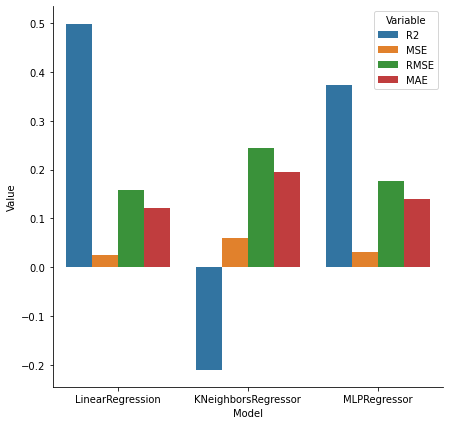

In [25]:
fig, ax1 = plt.subplots(figsize=(7, 7))
tidy=comparison_df.melt(id_vars='Model').rename(columns=str.title)
tidy
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

Linear Regression is here the algorithm displaying the best results, albeit the R2 is still suboptimal. 

Also important to note is that the metrics displayed have not been inverse-normalized. But, for comparison purposes, it's not necessary.